In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
!pip install chart_studio

     |████████████████████████████████| 71kB 5.2MB/s 


In [52]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.model_selection import train_test_split

from matplotlib import pyplot
import matplotlib.pyplot as plt

In [53]:
# best submit data

path = '/content/drive/MyDrive/Colab Notebooks/DACON CUP/submit_data'

best = pd.read_csv(path + '/submission0111_1.csv', encoding = 'euc-kr')
best.set_index('DateTime', inplace = True)
best.index = pd.to_datetime(best.index)

lstm_sub_best = pd.read_csv(path + '/seed40_add 날짜feature.csv', encoding = 'euc-kr')
lstm_sub_best.set_index('DateTime', inplace = True)
lstm_sub_best.index = pd.to_datetime(best.index)

xgb_sub_best = pd.read_csv(path + '/xgb_최고기록_chan.csv', encoding = 'euc-kr')
xgb_sub_best.set_index('DateTime', inplace = True)
xgb_sub_best.index = pd.to_datetime(best.index)

In [54]:
submission= pd.read_csv('cpt_count Encoding.csv', encoding = 'euc-kr')
submission.set_index('DateTime', inplace = True)
submission.index = pd.to_datetime(best.index)

- stacking

In [60]:
mean_sub = ((xgb_sub_best+submission)/2).round().astype(int)
mean_sub.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,3436,3432,904,85944
2020-11-10,4252,4008,1066,112560
2020-11-11,4074,3634,886,104226
2020-11-12,4111,3694,924,102394
2020-11-13,3590,3238,902,98653


In [59]:
# mean_sub.to_csv('data/submission0111_1.csv', encoding = 'euc_kr',index=True)

- 결과 비교

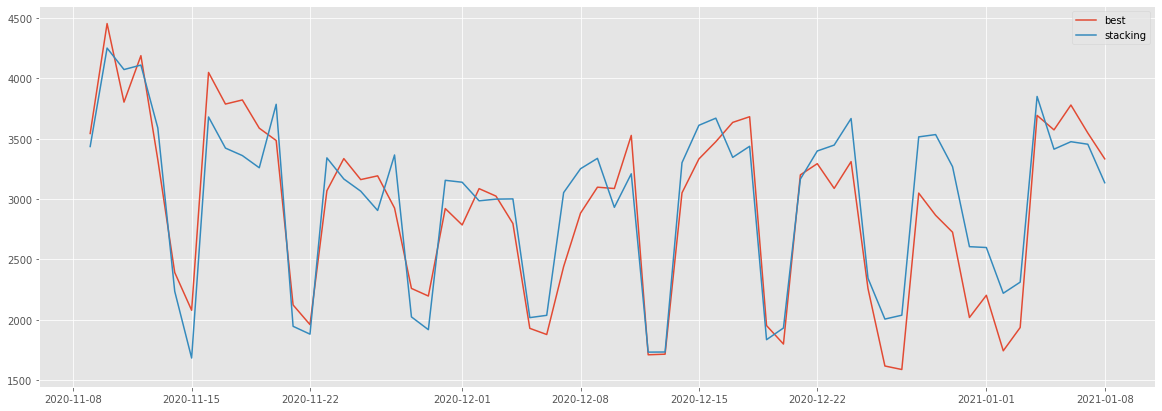

In [63]:
# plot expected vs preducted


plt.figure(figsize = (20,7))
pyplot.plot(best['사용자'], label='best')
#pyplot.plot(submission['사용자'], label='Predicted')
pyplot.plot(mean_sub['사용자'], label = 'stacking')
pyplot.legend()
pyplot.show()

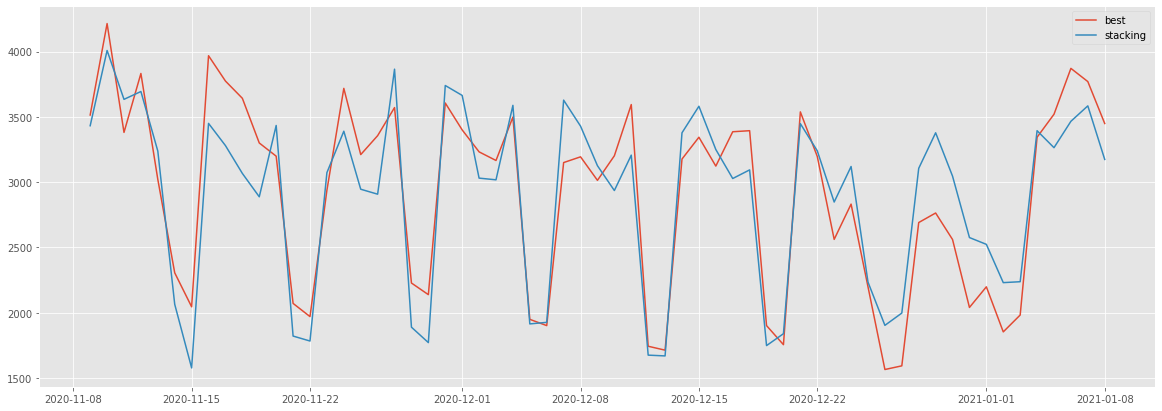

In [68]:

plt.figure(figsize = (20,7))
pyplot.plot(best['세션'], label='best')
#pyplot.plot(submission['세션'], label='Predicted')
pyplot.plot(mean_sub['세션'], label = 'stacking')
pyplot.legend()
pyplot.show()

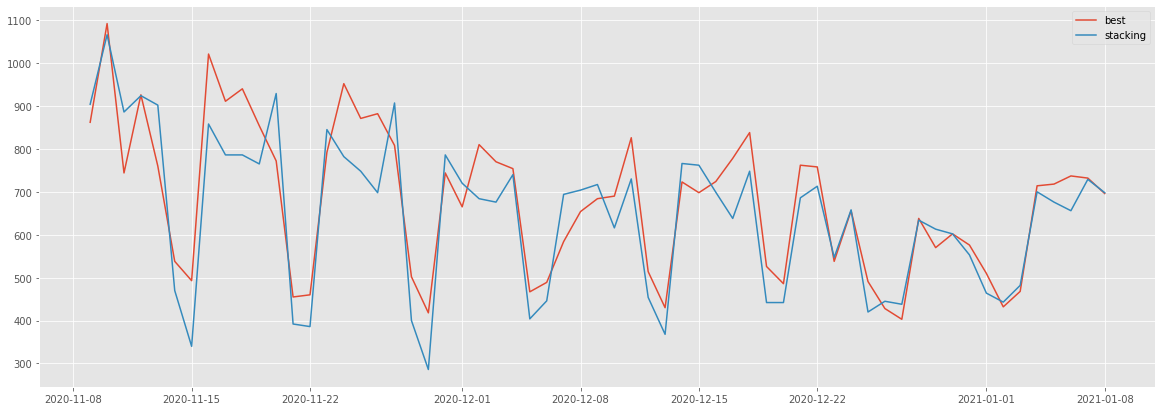

In [70]:

plt.figure(figsize = (20,7))
pyplot.plot(best['신규방문자'], label='best')
#pyplot.plot(submission['신규방문자'], label='Predicted')
pyplot.plot(mean_sub['신규방문자'], label = 'stacking')
pyplot.legend()
pyplot.show()

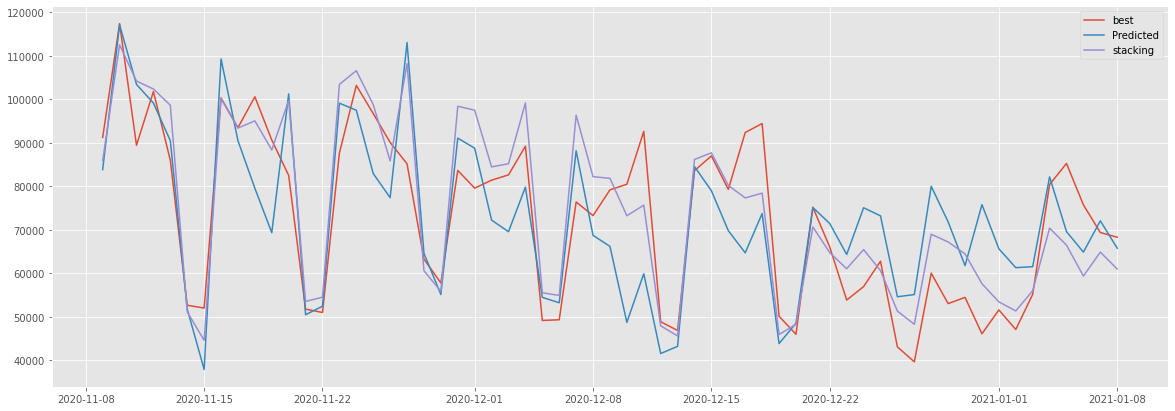

In [73]:

plt.figure(figsize = (20,7))
pyplot.plot(best['페이지뷰'], label='best')
pyplot.plot(submission['페이지뷰'], label='Predicted')
pyplot.plot(mean_sub['페이지뷰'], label = 'stacking')
pyplot.legend()
pyplot.show()